## Common formats

It's common to have 4D arrays in netcdf files with dimensions of (time, x, y, z) or (time, lat, lon, radius). When loading data into yt, we must provide a sub-selection in order to extract a 3D array. To do that, you can use the `sel_dict` argument to pass in a typical xarray-style selection dictionary.

yt : [INFO     ] 2022-10-14 17:53:42,545 Parameters: current_time              = 1495158014681000000 ns
yt : [INFO     ] 2022-10-14 17:53:42,547 Parameters: domain_dimensions         = [ 46 251 251]
yt : [INFO     ] 2022-10-14 17:53:42,548 Parameters: domain_left_edge          = [     0. -50000. -50000.]
yt : [INFO     ] 2022-10-14 17:53:42,550 Parameters: domain_right_edge         = [15000. 50000. 50000.]
yt : [INFO     ] 2022-10-14 17:53:42,550 Parameters: cosmological_simulation   = 0


Inferred coordinate type is cartesian -- to override, use ds.yt.set_coordinate_type
('cartesian', ['z', 'y', 'x'])


yt : [INFO     ] 2022-10-14 17:53:42,712 xlim = -50000.000000 50000.000000
yt : [INFO     ] 2022-10-14 17:53:42,713 ylim = -50000.000000 50000.000000
yt : [INFO     ] 2022-10-14 17:53:42,714 xlim = -50000.000000 50000.000000
yt : [INFO     ] 2022-10-14 17:53:42,715 ylim = -50000.000000 50000.000000
yt : [INFO     ] 2022-10-14 17:53:42,721 Making a fixed resolution buffer of (('stream', 'reflectivity')) 800 by 800



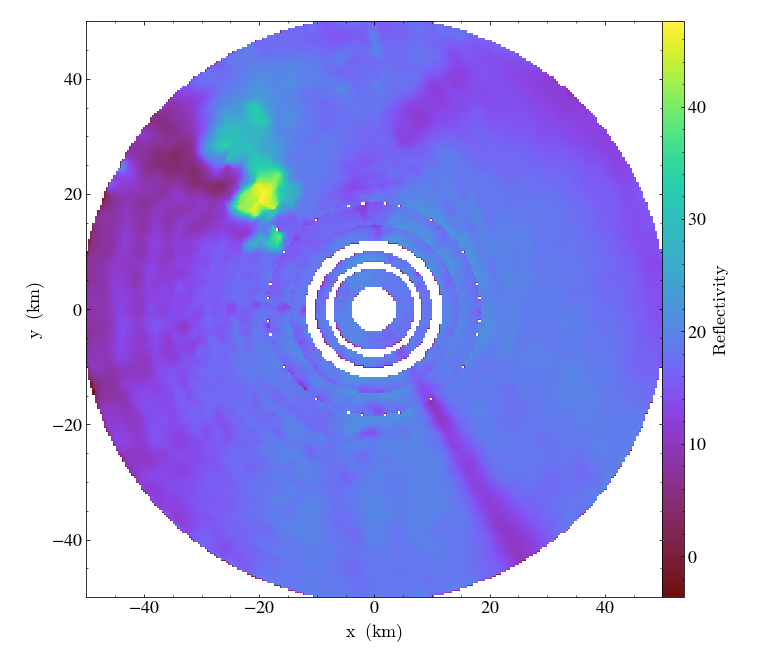

In [1]:
import xarray as xr 
import yt_xarray 
import yt
ds = yt_xarray.open_dataset('CfRadialGrid/grid1.nc')
yt_ds = ds.yt.load_uniform_grid(fields=['reflectivity'], sel_dict={'time':0}, length_unit='m')

slc = yt.SlicePlot(yt_ds, 'z', ('stream', 'reflectivity'))
slc.set_log(('stream', 'reflectivity'), False)

The default behavior passes `sel_dict` to the xarray `.isel` method, but you can instead provide a dictionary to use with the `sel` method by setting the `sel_dict_type` keyword to `sel`:

yt : [INFO     ] 2022-10-14 18:07:44,131 Parameters: current_time              = 1495158014681000000 ns
yt : [INFO     ] 2022-10-14 18:07:44,133 Parameters: domain_dimensions         = [ 46 251 251]
yt : [INFO     ] 2022-10-14 18:07:44,134 Parameters: domain_left_edge          = [     0. -50000. -50000.]
yt : [INFO     ] 2022-10-14 18:07:44,136 Parameters: domain_right_edge         = [15000. 50000. 50000.]
yt : [INFO     ] 2022-10-14 18:07:44,136 Parameters: cosmological_simulation   = 0


Inferred coordinate type is cartesian -- to override, use ds.yt.set_coordinate_type
('cartesian', ['z', 'y', 'x'])


yt : [INFO     ] 2022-10-14 18:07:44,320 xlim = -50000.000000 50000.000000
yt : [INFO     ] 2022-10-14 18:07:44,322 ylim = -50000.000000 50000.000000
yt : [INFO     ] 2022-10-14 18:07:44,323 xlim = -50000.000000 50000.000000
yt : [INFO     ] 2022-10-14 18:07:44,324 ylim = -50000.000000 50000.000000
yt : [INFO     ] 2022-10-14 18:07:44,331 Making a fixed resolution buffer of (('stream', 'reflectivity')) 800 by 800



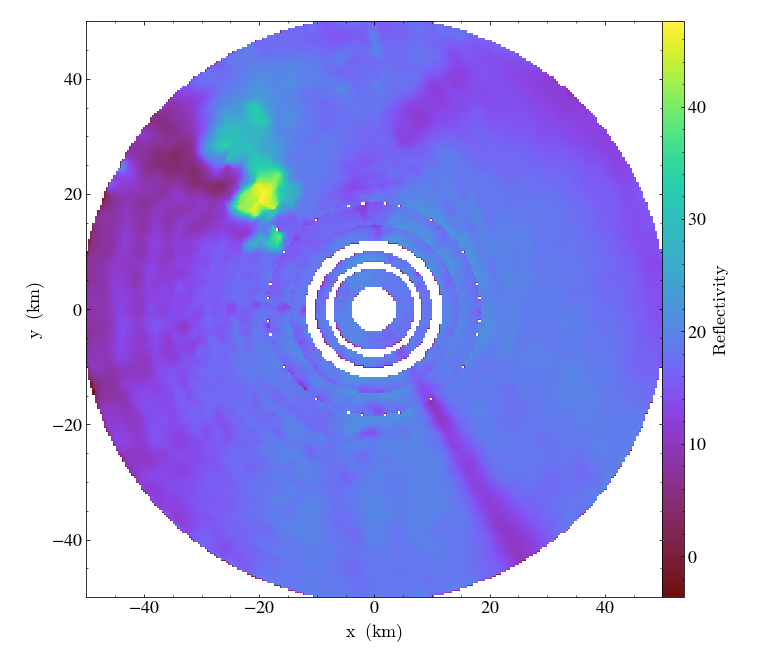

In [1]:
yt_ds = ds.yt.load_uniform_grid(fields=['reflectivity'], 
                                sel_dict={'time':ds.time[0].values}, 
                                sel_dict_type="sel", 
                                length_unit='m')

slc = yt.SlicePlot(yt_ds, 'z', ('stream', 'reflectivity'))
slc.set_log(('stream', 'reflectivity'), False)

## unkown coordinates 

It is also very likely that your netcdf files contain coordinates that yt will not recognize. The following nc file and `dbz` array, for example, uses the following coordinates: 

In [3]:
ds = yt_xarray.open_dataset('cm1_tornado_lofs/nc4_cm1_lofs_tornado_test.nc')
ds.dbz.dims

('time', 'zh', 'yh', 'xh')

to load into yt, we'll need to map out how to relate these spatial coordinates to those expected by yt. We can do so using adding to the `yt_xarray.known_coord_aliases` dictionary by adding a new key for our particular coordinate that points to the standard yt names:

yt : [INFO     ] 2022-10-14 17:54:31,425 Parameters: current_time              = 5500.0
yt : [INFO     ] 2022-10-14 17:54:31,426 Parameters: domain_dimensions         = [51 48 53]
yt : [INFO     ] 2022-10-14 17:54:31,427 Parameters: domain_left_edge          = [ 4.99999989e-03  5.22499990e+00 -6.56500006e+00]
yt : [INFO     ] 2022-10-14 17:54:31,428 Parameters: domain_right_edge         = [ 0.505       5.69500017 -6.04500008]
yt : [INFO     ] 2022-10-14 17:54:31,429 Parameters: cosmological_simulation   = 0


Inferred coordinate type is cartesian -- to override, use ds.yt.set_coordinate_type
('cartesian', ['z', 'y', 'x'])


yt : [INFO     ] 2022-10-14 17:54:31,681 xlim = -6.565000 -6.045000
yt : [INFO     ] 2022-10-14 17:54:31,682 ylim = 5.225000 5.695000
yt : [INFO     ] 2022-10-14 17:54:31,683 xlim = -6.565000 -6.045000
yt : [INFO     ] 2022-10-14 17:54:31,683 ylim = 5.225000 5.695000
yt : [INFO     ] 2022-10-14 17:54:31,688 Making a fixed resolution buffer of (('stream', 'dbz')) 800 by 800



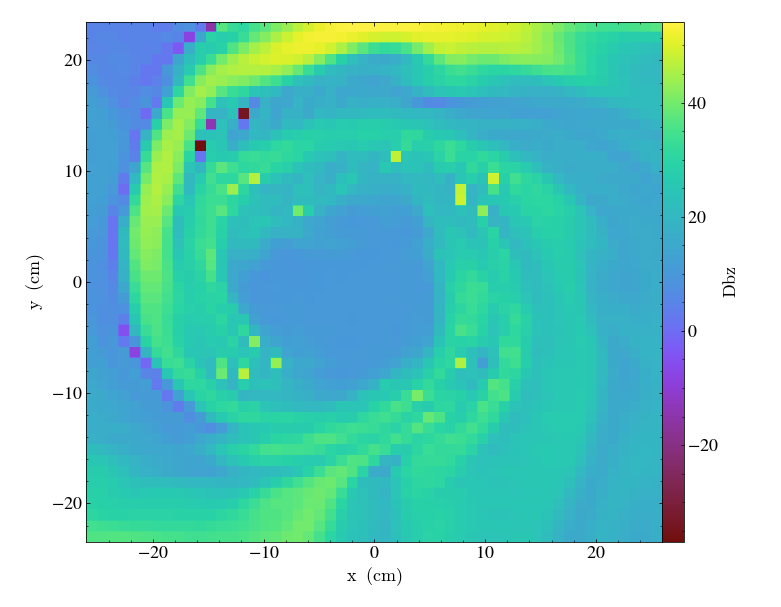

In [3]:
yt_xarray.known_coord_aliases['xh'] = 'x'
yt_xarray.known_coord_aliases['yh'] = 'y'
yt_xarray.known_coord_aliases['zh'] = 'z'

In [4]:

yt_ds = ds.yt.load_uniform_grid(fields=['dbz'], sel_dict={'time':0}, length_unit='m')

slc = yt.SlicePlot(yt_ds, 'z', ('stream', 'dbz'))
slc.set_log(('stream', 'dbz'), False)

yt : [INFO     ] 2022-10-14 18:12:14,602 Parameters: current_time              = 5500.0
yt : [INFO     ] 2022-10-14 18:12:14,603 Parameters: domain_dimensions         = [51 48 53]
yt : [INFO     ] 2022-10-14 18:12:14,605 Parameters: domain_left_edge          = [ 4.99999989e-03  5.22499990e+00 -6.56500006e+00]
yt : [INFO     ] 2022-10-14 18:12:14,605 Parameters: domain_right_edge         = [ 0.505       5.69500017 -6.04500008]
yt : [INFO     ] 2022-10-14 18:12:14,606 Parameters: cosmological_simulation   = 0


Inferred coordinate type is cartesian -- to override, use ds.yt.set_coordinate_type
('cartesian', ['zh', 'yh', 'xh'])


ValueError: 'z' is not a valid axis name. Expected one of 'zh', 'yh', 'xh'.